In [1]:
!pip install music21

     |████████████████████████████████| 19.2 MB 1.8 MB/s            
  Preparing metadata (setup.py) ... - \ | done
  Created wheel for music21: filename=music21-7.1.0-py3-none-any.whl size=21912606 sha256=79e0fe0b564f47e0b10ae37b049fade5f6c942b196a9cde5f7e3bc5f666c361b
  Stored in directory: /root/.cache/pip/wheels/98/3c/67/9e30a8a4c3ac934068c95d2c27e38e1b5e5016a9257dbbf5d0
Successfully built music21


In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from music21 import *

In [3]:
base_midi = converter.parse('../input/nes-midi-data/data/train/093_DuckTales_00_01Opening.mid')

type(base_midi)

/opt/conda/lib/python3.7/site-packages/music21/midi/translate.py:792: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent PROGRAM_CHANGE, track=4, channel=10, data=121>; getting generic UnpitchedPercussion
  TranslateWarning)


music21.stream.base.Score

In [4]:
def list_instruments(midi):
    partStream = midi.parts.stream()
    for p in partStream:
        aux = p
        print(p.partName)

list_instruments(base_midi)

p1
p2
tr
no


In [5]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def extract_notes(midi_part):
    parent_element = []
    ret = []
    for nt in midi_part.flat.notes:
        if isinstance(nt, note.Note):
            ret.append(max(0.0, nt.pitch.ps))
            parent_element.append(nt)
        elif isinstance(nt, chord.Chord):
            for pitch in nt.pitches:
                ret.append(max(0.0, pitch.ps))
                parent_element.append(nt)
    
    return ret, parent_element

In [6]:
def print_parts_countour(midi):
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(1,1,1)
    minPitch = pitch.Pitch('C10').ps
    maxPitch = 0
    xMax = 0

    # Drawing notes
    for i in range(len(midi.parts)):
        top = midi.parts[i].flat.notes
        y, parent_element = extract_notes(top)
        if (len(y) < 1): continue

        x = [n.offset for n in parent_element]
        ax.scatter(x, y, alpha=0.6, s=7)

        aux = min(y)
        if (aux < minPitch): minPitch = aux

        aux = max(x)
        if (aux > xMax): xMax = aux
    
    for i in range(1, 10):
        linePitch = pitch.Pitch('C{0}'.format(i)).ps
        if (linePitch > minPitch and linePitch < maxPitch):
            ax.add_line(mlines.Line2D([0, xMax], [linePitch, linePitch], color='red', alpha=0.1))
    
    plt.ylabel("Note index (each octave has 12 notes)")
    plt.xlabel("Number of quarter notes (beats)")
    plt.title('Voices motion approximation, each color is a different instrument, red lines show each octave')
    plt.show()

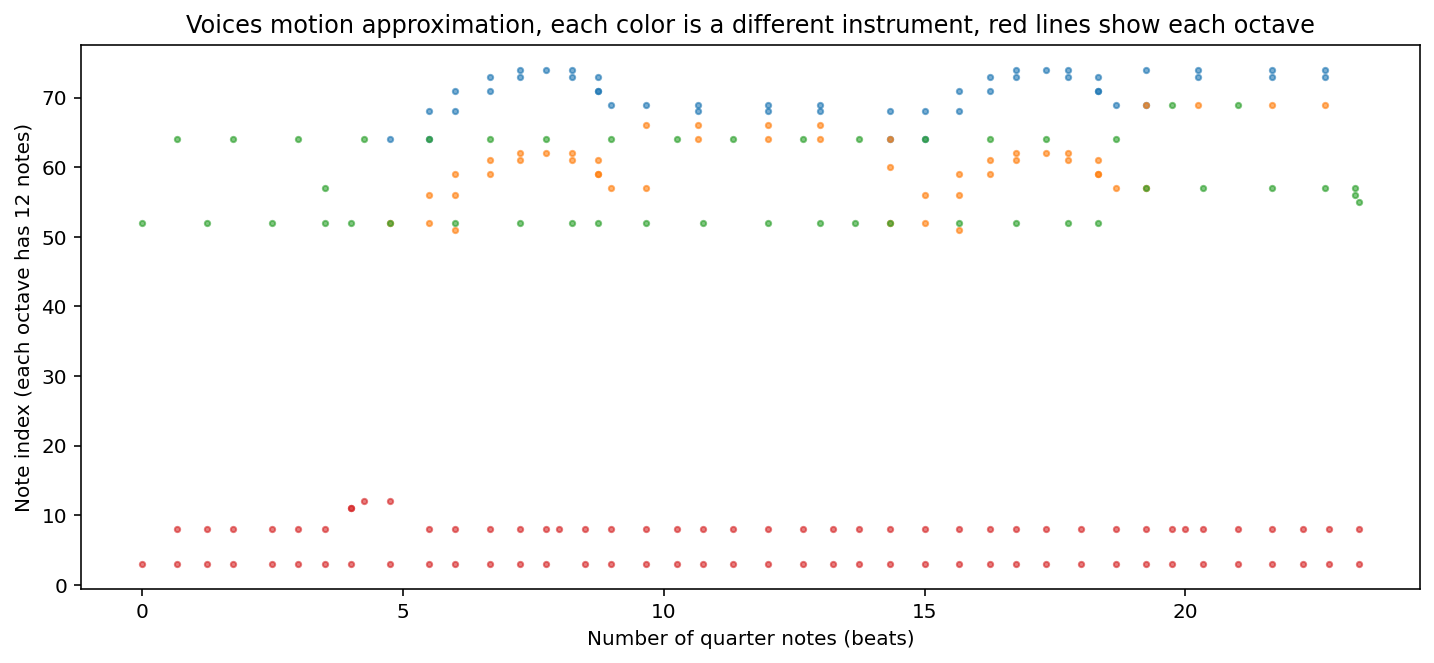

In [7]:
print_parts_countour(base_midi.measures(0, 6))

<music21.graph.plot.HistogramPitchClass for <music21.stream.Score 0x7faa5ce2cdd0>>

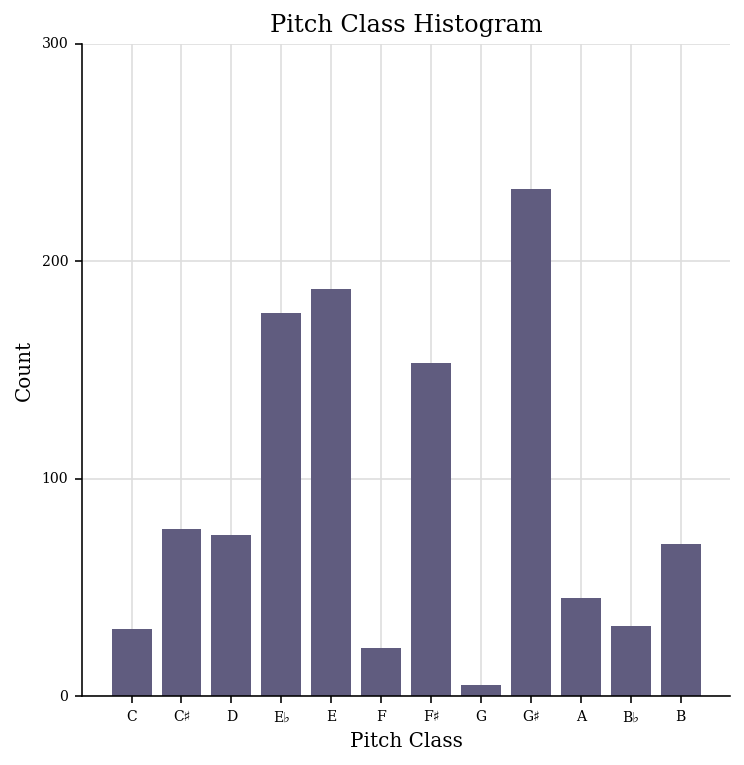

In [8]:
base_midi.plot('histogram', 'pitchClass', 'count')

<music21.graph.plot.ScatterPitchClassOffset for <music21.stream.Score 0x7faa5ce2cdd0>>

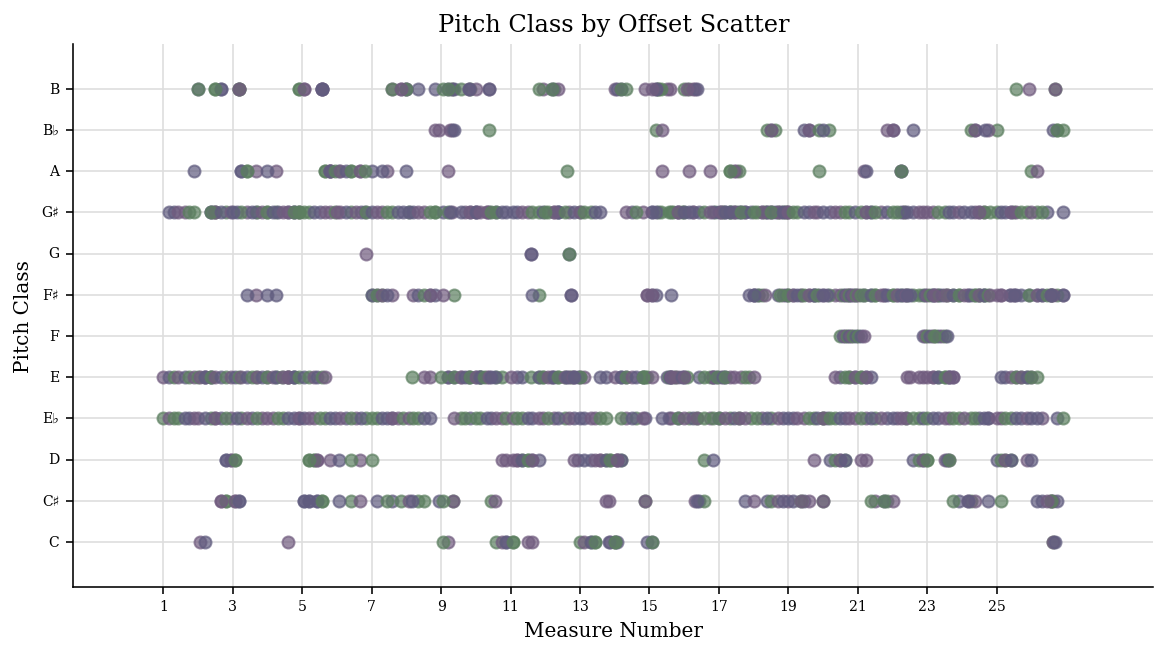

In [9]:
base_midi.plot('scatter', 'offset', 'pitchClass')

In [10]:
timeSignature = base_midi.getTimeSignatures()[0]
music_analysis = base_midi.analyze('key')
print("Music time signature: {0}/{1}".format(timeSignature.beatCount, timeSignature.denominator))
print("Expected music key: {0}".format(music_analysis))
print("Music key confidence: {0}".format(music_analysis.correlationCoefficient))
print("Other music key alternatives:")
for analysis in music_analysis.alternateInterpretations:
    if (analysis.correlationCoefficient > 0.5):
        print(analysis)

Music time signature: 4/4
Expected music key: c# minor
Music key confidence: 0.8560197890741328
Other music key alternatives:
E major
B major


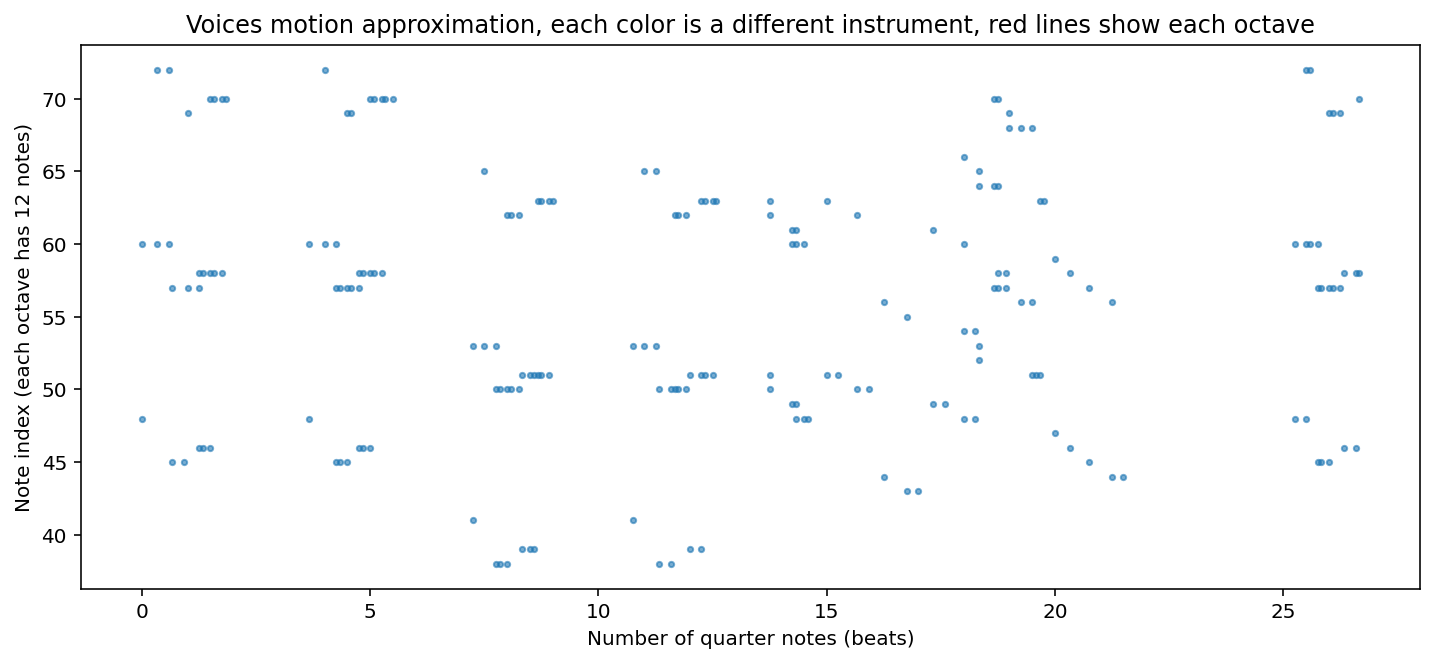

{0.0} <music21.stream.Measure 1 offset=0.0>
    {0.0} <music21.instrument.Sampler 'p2: Sampler'>
    {0.0} <music21.clef.TrebleClef>
    {0.0} <music21.tempo.MetronomeMark animato Quarter=120.0>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.chord.Chord C3 C4>
    {0.3333} <music21.chord.Chord C4 C5>
    {0.5833} <music21.chord.Chord C4 C5>
    {0.6667} <music21.chord.Chord A2 A3>
    {0.9167} <music21.chord.Chord A2>
    {1.0} <music21.chord.Chord A3 A4>
    {1.25} <music21.chord.Chord B-2 A3 B-3>
    {1.3333} <music21.chord.Chord B-2 B-3>
    {1.5} <music21.chord.Chord B-2 B-3 B-4>
    {1.5833} <music21.chord.Chord B-3 B-4>
    {1.75} <music21.chord.Chord B-3 B-4>
    {1.8333} <music21.chord.Chord B-4>
    {2.0} <music21.note.Rest 5/3ql>
    {3.6667} <music21.chord.Chord C3 C4>
    {3.9167} <music21.note.Rest 1/12ql>


In [11]:
temp_midi_chords = converter.parse(
    '../input/nes-midi-data/data/train/322_SuperMarioBros__01_02Underground.mid').chordify()
temp_midi = stream.Score()
temp_midi.insert(0, temp_midi_chords)

# Printing merged tracks.
print_parts_countour(temp_midi)

# Dumping first measure notes
temp_midi_chords.measures(0, 1).show("text")

In [12]:
# def note_count(measure, count_dict):
#     bass_note = None
#     for chord in measure.recurse().getElementsByClass('Chord'):
#         # All notes have the same length of its chord parent.
#         note_length = chord.quarterLength
#         for note in chord.pitches:          
#             # If note is "C5", note.name is "C". We use "C5"
#             # style to be able to detect more precise inversions.
#             note_name = str(note) 
#             if (bass_note is None or bass_note.ps > note.ps):
#                 bass_note = note
                
#             if note_name in count_dict:
#                 count_dict[note_name] += note_length
#             else:
#                 count_dict[note_name] = note_length
        
#     return bass_note
                
# def simplify_roman_name(roman_numeral):
#     # Chords can get nasty names as "bII#86#6#5",
#     # in this method we try to simplify names, even if it ends in
#     # a different chord to reduce the chord vocabulary and display
#     # chord function clearer.
#     ret = roman_numeral.romanNumeral
#     inversion_name = None
#     inversion = roman_numeral.inversion()
    
#     # Checking valid inversions.
#     if ((roman_numeral.isTriad() and inversion < 3) or
#             (inversion < 4 and
#                  (roman_numeral.seventh is not None or roman_numeral.isSeventh()))):
#         inversion_name = roman_numeral.inversionName()
        
#     if (inversion_name is not None):
#         ret = ret + str(inversion_name)
        
#     elif (roman_numeral.isDominantSeventh()): ret = ret + "M7"
#     elif (roman_numeral.isDiminishedSeventh()): ret = ret + "o7"
#     return ret

# def harmonic_reduction(midi_file):
#     ret = []
#     temp_midi = stream.Score()
#     temp_midi_chords = midi_file.chordify()
#     temp_midi.insert(0, temp_midi_chords)
#     music_key = temp_midi.analyze('key')
#     max_notes_per_chord = 4
#     for m in temp_midi_chords.measures(0, None): # None = get all measures.
#         if (type(m) != stream.Measure):
#             continue
        
#         # Here we count all notes length in each measure,
#         # get the most frequent ones and try to create a chord with them.
#         count_dict = dict()
#         bass_note = note_count(m, count_dict)
#         if (len(count_dict) < 1):
#             ret.append("-") # Empty measure
#             continue
        
#         sorted_items = sorted(count_dict.items(), key=lambda x:x[1])
#         sorted_notes = [item[0] for item in sorted_items[-max_notes_per_chord:]]
#         measure_chord = chord.Chord(sorted_notes)
        
#         # Convert the chord to the functional roman representation
#         # to make its information independent of the music key.
#         roman_numeral = roman.romanNumeralFromChord(measure_chord, music_key)
#         ret.append(simplify_roman_name(roman_numeral))
        
#     return ret

# harmonic_reduction(base_midi)[0:10]

In [13]:
commonNoteQuarterlen = features.native.MostCommonNoteQuarterLength(base_midi)
fe = features.native.RangeOfNoteQuarterLengths(base_midi)

In [14]:
fejSym = features.jSymbolic.AverageNoteDurationFeature(base_midi)
print(fejSym.extract().description)
print(fejSym.extract().vector)

Average duration of notes in seconds.
[0.15417531120159061]


In [15]:
print(commonNoteQuarterlen.extract().description)
print(commonNoteQuarterlen.extract().vector)
print(fe.extract().description)
print(fe.extract().vector)

The value of the most common quarter length.
[0.25]
Difference between the longest and shortest quarter lengths.
[4.0]


In [16]:
s = corpus.parse("mozart/k155", 2)
print(s.metadata.write)

<bound method Music21Object.write of <music21.metadata.Metadata object at 0x7faa45303f10>>


In [17]:
mozart_fe = features.native.RangeOfNoteQuarterLengths(s)
print(mozart_fe.extract().vector)

[4.0]


In [18]:
def extract_features(midi_file):
    extracted_features = np.array([
        features.native.MostCommonNoteQuarterLength(midi_file).extract().vector,
        features.native.RangeOfNoteQuarterLengths(midi_file).extract().vector,
        features.jSymbolic.AverageNoteDurationFeature(midi_file).extract().vector,
        features.native.MostCommonPitchClassSetSimultaneityPrevalence(midi_file).extract().vector
    ]).flatten()
    
    return extracted_features

In [19]:
feature_set = extract_features(s)
print(feature_set)

[0.5        4.         0.26372119 0.10741688]
